In [1]:
import pandas as pd
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [2]:
yf.pdr_override()

stock = 'tsla'

start=dt.datetime(2019,6,1)
now =dt.datetime.now()

df = pdr.get_data_yahoo(stock,start,now)

df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-05-31,37.020000,37.984001,36.820000,37.032001,37.032001,52033500
2019-06-03,37.102001,37.335999,35.397999,35.793999,35.793999,65322000
2019-06-04,36.220001,38.796001,35.922001,38.720001,38.720001,69037500
2019-06-05,39.736000,40.256001,38.369999,39.318001,39.318001,67554000
2019-06-06,40.888000,42.200001,40.360001,41.189999,41.189999,101211000


46.95:2019-06-18 00:00:00
48.31:2019-07-03 00:00:00
53.21:2019-07-24 00:00:00
50.7:2019-09-12 00:00:00
49.74:2019-09-27 00:00:00
68.17:2019-10-28 00:00:00
72.24:2019-11-20 00:00:00
118.9:2020-01-22 00:00:00
193.8:2020-02-04 00:00:00
188.96:2020-02-19 00:00:00
154.99:2020-04-17 00:00:00
173.96:2020-04-30 00:00:00
205.5:2020-06-10 00:00:00
359.0:2020-07-13 00:00:00
502.49:2020-09-01 00:00:00
465.9:2020-10-14 00:00:00
452.5:2020-11-09 00:00:00
654.32:2020-12-09 00:00:00
695.0:2020-12-18 00:00:00
884.49:2021-01-08 00:00:00
900.4:2021-01-25 00:00:00
708.16:2021-04-05 00:00:00
780.79:2021-04-14 00:00:00


<AxesSubplot:xlabel='Date'>

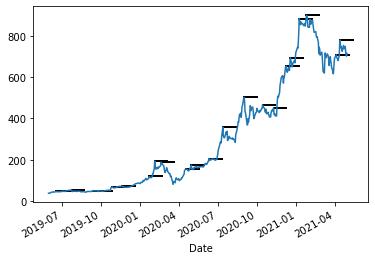

In [6]:
pivots =[]
dates =[]
value_range = [0,0,0,0,0,0,0,0,0,0,0]
date_range = [0,0,0,0,0,0,0,0,0,0,0]

counter =0

for i in df.index:
    value = max(value_range)
    value_range = value_range[1:9]
    value_range.append(round(df['High'][i],2))
    date_range=date_range[1:9]
    date_range.append(i)
    
    if value==max(value_range):
        counter+=1
    if value<max(value_range):
        counter =0
    
    if counter ==5:
        date_index = value_range.index(value)
        date_pivot = date_range[date_index]
        pivots.append(value)
        dates.append(date_pivot)
 

for i in range(len(pivots)):
    print (str(pivots[i])+ ':'+ str(dates[i]))

for i in range(len(pivots)):
    extra_dates = [x + dt.timedelta(30) for x in dates]


plt.plot([dates,extra_dates],[pivots,pivots],color='black',linewidth=2,marker=',')
df['High'].plot()

46.95:2019-06-18 00:00:00
48.31:2019-07-03 00:00:00
53.21:2019-07-24 00:00:00
50.7:2019-09-12 00:00:00
49.74:2019-09-27 00:00:00
68.17:2019-10-28 00:00:00
72.24:2019-11-20 00:00:00
118.9:2020-01-22 00:00:00
193.8:2020-02-04 00:00:00
188.96:2020-02-19 00:00:00
154.99:2020-04-17 00:00:00
173.96:2020-04-30 00:00:00
205.5:2020-06-10 00:00:00
359.0:2020-07-13 00:00:00
502.49:2020-09-01 00:00:00
465.9:2020-10-14 00:00:00
452.5:2020-11-09 00:00:00
654.32:2020-12-09 00:00:00
695.0:2020-12-18 00:00:00
884.49:2021-01-08 00:00:00
900.4:2021-01-25 00:00:00
708.16:2021-04-05 00:00:00
780.79:2021-04-14 00:00:00


<AxesSubplot:xlabel='Date'>

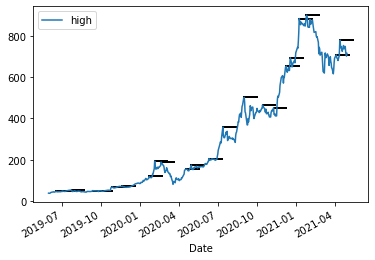

In [5]:
#alternative plot method as seen in vid

for i in range(len(pivots)):
    print (str(pivots[i]) + ':' + str(dates[i]))
    
    plt.plot_date([dates[i],dates[i]+dt.timedelta(days=30)],[pivots[i],pivots[i]],linestyle = '-',marker=',',linewidth=2,color='black')

df['High'].plot(label='high',legend = 'show')
